- 2x2 avg pool?

## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *
from planet import *

In [2]:
bs=64; sz=64; metrics=[f2]
f_model = resnet34
path = "/data/jhoward/fast/planet/"

## Train

In [3]:
n=len(list(open(f'{path}train_v2.csv')))-1

In [ ]:
def get_data(path, tfms,bs,  n, cv_idx):
    val_idxs = get_cv_idxs(n, cv_idx)
    return ImageClassifierData.from_csv(path, 'train-jpg', f'{path}train_v2.csv', bs, tfms,
                                 suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')
    
def get_data_zoom(f_model, path, sz, bs, n, cv_idx):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return get_data(path, tfms, bs, n, cv_idx)

In [4]:
data = get_data_zoom(f_model, path, 64, bs, n, 0)

In [5]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics)

In [9]:
lrf=learn.lr_find(True)

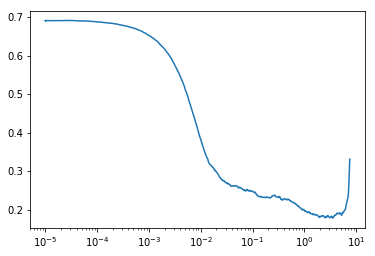

In [10]:
lrf.plot()

In [ ]:
learn.use_fc=True

In [7]:
learn.fit(0.3, 2)

[ 0.146489  0.133464  0.878358]


[ 0.138298  0.126353  0.887249]



In [ ]:
learn.use_fc=False

In [8]:
learn.fit(0.3, 3, cycle_len=1, cycle_mult=2)

[ 0.135475  0.122881  0.888885]


[ 0.133459  0.123017  0.887289]


[ 0.131687  0.120791  0.891736]


[ 0.127797  0.120839  0.890182]


[ 0.126033  0.119959  0.891817]


[ 0.127942  0.118343  0.893171]


[ 0.120969  0.118212  0.893162]



In [9]:
lrs = np.array([0.03,0.09,0.3])

In [12]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(lrs, 2, cycle_len=1)

[ 0.114645  0.106312  0.906095]


[ 0.107245  0.10245   0.909795]



[ 0.103818  0.098824  0.913306]


[ 0.104436  0.098034  0.915262]



[ 0.103749  0.097636  0.915495]


[ 0.1017    0.096332  0.915918]



In [13]:
learn.unfreeze()

In [14]:
learn.fit(lrs, 3, cycle_len=3)

[ 0.104756  0.098735  0.913559]


[ 0.095996  0.094545  0.919189]


[ 0.093762  0.094     0.919231]



In [15]:
learn.fit(lrs, 2, cycle_len=3)

[ 0.102347  0.096667  0.917596]


[ 0.092904  0.093314  0.919848]


[ 0.090797  0.092575  0.919956]


[ 0.097739  0.097394  0.912984]


[ 0.089996  0.093183  0.919374]


[ 0.088772  0.092019  0.920318]



In [16]:
learn.save('rn34_0-64')

In [17]:
data = get_data_zoom(f_model, path, 128, bs, n, 0)

In [18]:
learn.set_data(data)

In [31]:
learn.load('rn34_0-64')
learn.freeze()

In [ ]:
learn.use_fc=True

In [32]:
learn.fit(0.3, 1)

[ 0.123529  0.113065  0.899776]


In [ ]:
learn.use_fc=False

In [33]:
learn.fit(0.3, 2, cycle_len=1, cycle_mult=2)

[ 0.091841  0.092738  0.9188  ]


[ 0.092192  0.091708  0.919595]


[ 0.091117  0.090908  0.920308]


In [34]:
wds = np.array([3e-6,1e-5,3e-5])

In [35]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(lrs, 1, cycle_len=1, wds=wds)

[ 0.09108   0.087087  0.924083]


[ 0.088169  0.08612   0.924674]


[ 0.086344  0.085802  0.925765]


In [36]:
learn.save('rn34_0-128-pre')

In [37]:
learn.unfreeze()

In [38]:
learn.fit(lrs, 3, cycle_len=3, wds=wds)

[ 0.090652  0.08788   0.924184]


[ 0.085207  0.085359  0.925379]


[ 0.080438  0.084059  0.92758 ]


[ 0.087953  0.086951  0.925016]


[ 0.084552  0.085869  0.924432]


[ 0.079318  0.084865  0.926657]


[ 0.087584  0.086966  0.925278]


[ 0.081545  0.086341  0.923572]


[ 0.078667  0.083958  0.927148]


In [39]:
learn.save('rn34_0-128')

In [40]:
data = get_data_zoom(f_model, path, 256, bs, n, 0)

In [41]:
learn.set_data(data)

In [42]:
learn.freeze()

In [ ]:
learn.use_fc=True

In [43]:
learn.fit(0.3, 1)

[ 0.119793  0.110644  0.900993]


In [ ]:
learn.use_fc=False

In [44]:
learn.fit(0.3, 2, cycle_len=1, cycle_mult=2)

[ 0.087609  0.09061   0.9196  ]


[ 0.085719  0.089695  0.921278]


[ 0.087261  0.089407  0.920409]


In [45]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(lrs, 1, cycle_len=1, wds=wds)

[ 0.086376  0.083865  0.927127]


[ 0.082269  0.083222  0.927118]


[ 0.081438  0.082244  0.928564]


In [46]:
learn.save('rn34_0-256-pre')

In [47]:
learn.unfreeze()

In [28]:
learn.fit(12, 0.2, cycle_len=3)

[0.09012639336293252, 0.087997802, 0.92540838955513793]


[0.08059217336600637, 0.084035844, 0.92672080111523913]


[0.08334669009679124, 0.082157291, 0.92942253114100215]


[0.0887295235186709, 0.085642718, 0.92801383511240043]


[0.08489879788227042, 0.082809515, 0.92854429532602589]


[0.07882491696899409, 0.082283579, 0.92914513139003108]


[0.0912987530417967, 0.086790472, 0.92620491463315591]


[0.08385022651027914, 0.083163142, 0.92943238834428255]


[0.07717705577373618, 0.082128257, 0.92917721634177808]


[0.08984001146171064, 0.088164464, 0.9239565551637926]


Process Process-370:
Process Process-369:
Process Process-371:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/jhoward/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/jhoward/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indic

KeyboardInterrupt: 

In [15]:
learn.save('rn34_0-244')

### Import data

In [15]:
tfm=image_gen(noop, 64, pad=6)
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, [1,2,3], (tfm,tfm),
               suffix='.jpg')

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
x,y=next(iter(ds.val_dl))
im=x[0].numpy()
plt.imshow(im)

In [ ]:
plt.imshow(np.rollaxis(x[0].numpy(),0,3));

In [ ]:
PIL.Image.open(ds.val_dl.dataset.fnames[0])